# A quick tutorial on Julia DataFrames

## What is a DataFrame?

- Some 2-D tabular data of cells
- rows have the same number of cells about one observation
- Columns have the same number of cells of the same feature across all observations
- A column has a name.

### `DataFrame.jl`

- provides a set of tools for working with tabular data
  - An in-memory database
  - Counterpart of
    - pandas (Python)
    - data.frame (R)
    - data.table, tibble, dplyr (R)

## What we are going to practice today

- Obtain data from web
- Uncompress it
- Load it into a DataFrame
- Some simple analysis

## Fetching, unpacking and inspecting the data

In [2]:
import Downloads
file = "new_puzzles.csv.zst"
url = "https://database.lichess.org/lichess_db_puzzle.csv.zst"
if isfile(file)
    @info "File already downloaded"
else
    @info "Downloading file"
    Downloads.download(url, file)
end

┌ Info: File already downloaded
└ @ Main /mnt/w/1t-nvme/projects/Talk-Julia/julia/06-DataFrames-1.ipynb:5


In [3]:
using CodecZstd
compressed = read(file)
plain = transcode(ZstdDecompressor, compressed)
length(plain) / length(compressed)

3.684027968421522

In [4]:
open("puzzles.csv", "w") do io
    println(io, "PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags")
    write(io, plain)
end

589990400

In [5]:
first(readlines("puzzles.csv"), 5)

5-element Vector{String}:
 "PuzzleId,FEN,Moves,Rating,Ratin" ⋯ 25 bytes ⋯ "lays,Themes,GameUrl,OpeningTags"
 "00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N" ⋯ 120 bytes ⋯ "lichess.org/787zsVup/black#48,"
 "0000D,5rk1/1p3ppp/pq3b2/8/8/1P1" ⋯ 90 bytes ⋯ "ttps://lichess.org/F8M8OS71#53,"
 "0009B,r2qr1k1/b1p2ppp/pp4n1/P1P" ⋯ 165 bytes ⋯ "_Pawn_Game_Leonardis_Variation"
 "000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8" ⋯ 94 bytes ⋯ "tps://lichess.org/l6AejDMO#105,"

## Loading the data into a DataFrame

In [6]:
using CSV, DataFrames
puzzles = CSV.read("puzzles.csv", delim=",", maxwarnings=0, DataFrame);
first(puzzles, 5)

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1789,76,95,3361,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1482,73,96,20220,advantage endgame short,https://lichess.org/F8M8OS71#53,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1533,75,92,403,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing


In [7]:
puzzle2 = CSV.read(plain, delim=",", maxwarnings=0, DataFrame, header=["PuzzleId","FEN","Moves","Rating","RatingDeviation","Popularity","NbPlays","Themes","GameUrl","OpeningTags"
]);
first(puzzle2, 5)

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1789,76,95,3361,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1482,73,96,20220,advantage endgame short,https://lichess.org/F8M8OS71#53,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1533,75,92,403,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing


In [8]:
# to free memory
compressed = nothing
plain = nothing
puzzle2 = nothing

In [9]:
show(describe(puzzles), truncate=14)

10×7 DataFrame
 Row │ variable         mean     min              median  max              nmi ⋯
     │ Symbol           Union…   Any              Union…  Any              Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ PuzzleId                  00008                    zzzhg                ⋯
   2 │ FEN                       1B1K4/2P5/4k3/…          rrqb2k1/3n2p1/…
   3 │ Moves                     a1a2 a3a2 b2a2…          h8h7 h6h7 g7h7…
   4 │ Rating           1546.42  400              1513.0  3166
   5 │ RatingDeviation  92.2384  50               77.0    500                  ⋯
   6 │ Popularity       83.0595  -100             89.0    114
   7 │ NbPlays          1358.4   0                286.0   1007571
   8 │ Themes                    advancedPawn a…          opening
   9 │ GameUrl                   https://liches…          https://liches…      ⋯
  10 │ OpeningTags               Alekhine_Defen…          Zukertort_Open…   24
               

Notes:
- PuzzleId—A unique identifier of the puzzle
- FEN—An encoding of a starting position of the puzzle
- Moves—Moves that are a solution to the puzzle
- Rating—Difficulty of the puzzle
- RatingDeviation—Accuracy of assessment of difficulty of the puzzle
- Popularity—How much the puzzle is liked by users (the higher, the better)
- NbPlays—Number of times a given puzzle was played
- Themes—Description of chess themes featured by the puzzle
- GameUrl—URL to the source game from which the puzzle was taken

In [10]:
nrow(puzzles), ncol(puzzles)

(3191820, 10)

In [11]:
names(puzzles)

10-element Vector{String}:
 "PuzzleId"
 "FEN"
 "Moves"
 "Rating"
 "RatingDeviation"
 "Popularity"
 "NbPlays"
 "Themes"
 "GameUrl"
 "OpeningTags"

In [12]:
CSV.write("puzzle2.csv", puzzles)
read("puzzle2.csv") == read("puzzles.csv")

true

## Retrieving a column

In [13]:
first(puzzles.Rating, 5)

5-element Vector{Int64}:
 1789
 1482
 1172
 1565
 1533

In [14]:
first(puzzles."Rating", 5)

5-element Vector{Int64}:
 1789
 1482
 1172
 1565
 1533

In [15]:
columnindex(puzzles, "Rating")

4

In [16]:
hasproperty(puzzles, "Rating")

true

In [17]:
first(puzzles[:, :Rating], 5) # a copy, so is much slower

5-element Vector{Int64}:
 1789
 1482
 1172
 1565
 1533

In [18]:
first(puzzles[!, :Rating], 5) # a view, so is much faster, so is puzzles[!, "Rating"], puzzles[!, 4]

5-element Vector{Int64}:
 1789
 1482
 1172
 1565
 1533

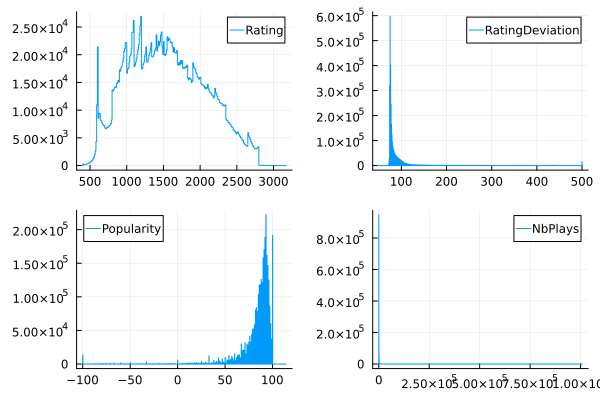

In [19]:
using Plots
plot(histogram(puzzles.Rating, label="Rating"), 
     histogram(puzzles.RatingDeviation, label="RatingDeviation"), 
     histogram(puzzles.Popularity, label="Popularity"),
     histogram(puzzles.NbPlays, label="NbPlays"),
     layout=(2, 2))

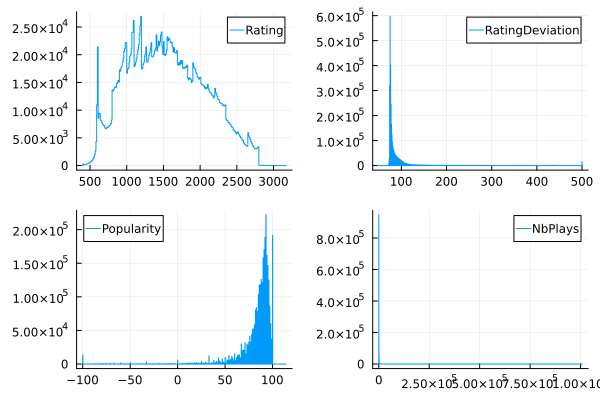

In [20]:
plot([histogram(puzzles[!, col]; label=col) for col in ["Rating", "RatingDeviation", "Popularity", "NbPlays"]]..., layout=(2, 2))

## DataFrame I/O using different formats

DataFrame can do I/O more than just CSV files.

- Apache Arrow, language independent columnar memory format, organized for efficient analytic operations on modern hardware, https://arrow.apache.org/
- SQLite, Parquet, MS Excel, JSON, MySQL, PostgreSQL, and more
- Serialization

### Apache Arrow

In [21]:
using Arrow

In [22]:
Arrow.write("puzzles.arrow", puzzles)

"puzzles.arrow"

In [23]:
arrow_table = Arrow.Table("puzzles.arrow")

Arrow.Table with 3191820 rows, 10 columns, and schema:
 :PuzzleId         String
 :FEN              String
 :Moves            String
 :Rating           Int64
 :RatingDeviation  Int64
 :Popularity       Int64
 :NbPlays          Int64
 :Themes           String
 :GameUrl          String
 :OpeningTags      Union{Missing, String}

In [25]:
puzzles_arrow = DataFrame(arrow_table);

In [26]:
puzzles == puzzles_arrow # => missing, as missing == missing -> missing

missing

In [28]:
first(puzzles_arrow.PuzzleId, 5)

5-element Vector{String}:
 "00008"
 "0000D"
 "0009B"
 "000Vc"
 "000Zo"

### SQLite

In [29]:
using SQLite

In [30]:
db = SQLite.DB("puzzles.sqlite") # create a new SQLite database

SQLite.DB("puzzles.sqlite")

In [31]:
SQLite.load!(puzzles, db, "puzzles") # store the DataFrame in the database

"puzzles"

In [32]:
SQLite.tables(db) # list the tables in the database

1-element Vector{SQLite.DBTable}:
 SQLite.DBTable("puzzles", Tables.Schema:
 :PuzzleId         Union{Missing, String}
 :FEN              Union{Missing, String}
 :Moves            Union{Missing, String}
 :Rating           Union{Missing, Int64}
 :RatingDeviation  Union{Missing, Int64}
 :Popularity       Union{Missing, Int64}
 :NbPlays          Union{Missing, Int64}
 :Themes           Union{Missing, String}
 :GameUrl          Union{Missing, String}
 :OpeningTags      Union{Missing, String})

In [33]:
SQLite.columns(db, "puzzles") # list the columns in the table

(cid = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name = ["PuzzleId", "FEN", "Moves", "Rating", "RatingDeviation", "Popularity", "NbPlays", "Themes", "GameUrl", "OpeningTags"], type = ["TEXT", "TEXT", "TEXT", "INT", "INT", "INT", "INT", "TEXT", "TEXT", "TEXT"], notnull = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dflt_value = [missing, missing, missing, missing, missing, missing, missing, missing, missing, missing], pk = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
query = DBInterface.execute(db, "SELECT * FROM puzzles")

SQLite.Query{false}(SQLite.Stmt(SQLite.DB("puzzles.sqlite"), Base.RefValue{Ptr{SQLite.C.sqlite3_stmt}}(Ptr{SQLite.C.sqlite3_stmt} @0x0000000003cef5c8), Dict{Int64, Any}()), Base.RefValue{Int32}(100), [:PuzzleId, :FEN, :Moves, :Rating, :RatingDeviation, :Popularity, :NbPlays, :Themes, :GameUrl, :OpeningTags], Type[Union{Missing, String}, Union{Missing, String}, Union{Missing, String}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, Int64}, Union{Missing, String}, Union{Missing, String}, Union{Missing, String}], Dict(:NbPlays => 7, :Themes => 8, :GameUrl => 9, :OpeningTags => 10, :Moves => 3, :RatingDeviation => 5, :FEN => 2, :Rating => 4, :PuzzleId => 1, :Popularity => 6…), Base.RefValue{Int64}(0))

In [36]:
puzzles_db = DataFrame(query)

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
,String,String,String,Int64,Int64,Int64,Int64,String,String,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1789,76,95,3361,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1482,73,96,20220,advantage endgame short,https://lichess.org/F8M8OS71#53,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1533,75,92,403,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15,g5e7 a5c3 b2c3 c6e7,1430,77,71,494,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_Defense
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1554,75,89,466,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K1 w - - 0 41,e3g3 f7f4 e5f4 f8f4,1961,83,62,87,crushing middlegame short,https://lichess.org/8sVpuwso#81,missing
9,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1039,80,85,62,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,missing


In [37]:
close(db)

### Serialization

In [38]:
using Serialization
serialize("puzzles.ser", puzzles)
puzzles_ser = deserialize("puzzles.ser")

Row,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
,String7,String,String,Int64,Int64,Int64,Int64,String,String,String?
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1789,76,95,3361,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,missing
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - - 2 27,d3d6 f8d8 d6d8 f6d8,1482,73,96,20220,advantage endgame short,https://lichess.org/F8M8OS71#53,missing
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP1P/RN1QR1K1 b - - 1 16,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Variation
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,missing
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w - - 0 35,e5f6 e8e1 g1f2 e1f1,1533,75,92,403,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,missing
6,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/2KR3R w - - 0 15,g5e7 a5c3 b2c3 c6e7,1430,77,71,494,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_Defense
7,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3R1RK1 b kq - 0 19,e8f7 e2e6 f7f8 e6f7,1554,75,89,466,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations
8,000mr,5r1k/5rp1/p7/1b2B2p/1P1P1Pq1/2R1Q3/P3p1P1/2R3K1 w - - 0 41,e3g3 f7f4 e5f4 f8f4,1961,83,62,87,crushing middlegame short,https://lichess.org/8sVpuwso#81,missing
9,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1039,80,85,62,crushing endgame fork short,https://lichess.org/tzeeBEc2#115,missing


## Summary

- DataFrames.jl is a package for working with tabular data
- You can use Codecs to compress/decompress data, which you will meet often
- `describe` for summary information about a DataFrame
- `nrow`, `ncol` for the number of rows and columns
- `names` for the column names
- Every column is a vector
- I/O is supported for many formats